# Machine Learning Finals Research Study

## Imports Libraries and Datasets

In [247]:
#importing essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Mounting googledrive with dataset files
from google.colab import drive

drive.mount('/content/drive')
pd.set_option('display.max_colwidth', 0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Creating dataframes from .csv files

In [248]:
# Opening the data .csv files 
ProbableCases_df = pd.read_csv('/content/drive/MyDrive/Final Output NLP Research Paper/COVID-19-DATABASE/COVID-19-DATABASE_Probable_Cases.csv')
SuspectedCases_df = pd.read_csv('/content/drive/MyDrive/Final Output NLP Research Paper/COVID-19-DATABASE/COVID-19-DATABASE_Suspected_Cases.csv')
ConfirmedCases_df = pd.read_csv('/content/drive/MyDrive/Final Output NLP Research Paper/COVID-19-DATABASE/COVID-19-DATABASE_Confirmed_Cases.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,44,45,46,47,48,60,61) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


####Probable Cases

In [250]:
ProbableCases_df.shape

(748, 61)

#### Suspected Cases

In [253]:
SuspectedCases_df.shape

(1692, 61)

#### Confirmed Cases 

In [256]:
ConfirmedCases_df.shape

(45707, 62)

## Data Processing



---



In [258]:
# Creating a global variable for the severity of the case column  for future use
MainColumn = 'SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL)'

# Creating a variable for the columns to be removed from the dataframes
remove = 'SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL)','LAST NAME', 'ONSET OF ILLNESS', 'PREGNANT (Y/N)',
'DATE OF SPECIMEN COLLECTION',	'ANTIGEN (POSITIVE/NEGATIVE)',	'PCR(POSITIVE/NEGATIVE)',	'RDT(+IGG, +IGM,NEGATIVE)',	
'CLASSIFICATION (CONFIRMED,SUSPECTED,PROBABLE,FOR VALIDATION)',	'QUARANTINE STATUS (ADMITTED,HOME QUARANTINE,TTMF,CLEARED,DISCHARGED)'

('CLASSIFICATION (CONFIRMED,SUSPECTED,PROBABLE,FOR VALIDATION)',
 'QUARANTINE STATUS (ADMITTED,HOME QUARANTINE,TTMF,CLEARED,DISCHARGED)')



---



In [259]:
#################################################################################################################################################################################
# Function for isolating relevent columns for study 
def simplify_df(origin_dataframe):

  SimpCases_df = origin_dataframe.filter(['LAST NAME']) 
  ExtraData = origin_dataframe.columns[22:40]

  for col in ExtraData:
    SimpCases_df[col] = origin_dataframe[col]

  return SimpCases_df
  
#################################################################################################################################################################################
# Function for removing unusable data columns to study
def drop_columns(dataframe):

  for i in remove:
    dataframe.drop(columns=[i], inplace=True)

  return dataframe

#################################################################################################################################################################################

# Application of the above functions 
SimpConCases_df = simplify_df(ConfirmedCases_df)
SimpConCases_df = drop_columns(SimpConCases_df)

SimpProCases_df = simplify_df(ProbableCases_df)
SimpProCases_df = drop_columns(SimpProCases_df)

SimpSusCases_df = simplify_df(SuspectedCases_df)
SimpSusCases_df = drop_columns(SimpSusCases_df)

In [260]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Reduced Dataframes

###### Confirmed Cases

In [261]:
SimpConCases_df.head()

,FEVER(Y/N),COYGH(Y/N),COLDS(Y/N),DOB(Y/N),LOSS OF SMELL(Y/N),LOSS OF TASTE (Y/N),SORETHROAT (Y/N),DIARRHEA(Y/N),OTHER SYMPTOMS,WITH COMORBIDITY (Y/N),"COMORBIDITY (HYPERTENSIVE, DIABETIC, WITH HEART PROBLEM, AND OTHERS)",DATE OF SPECIMEN COLLECTION,ANTIGEN (POSITIVE/NEGATIVE),PCR(POSITIVE/NEGATIVE),"RDT(+IGG, +IGM,NEGATIVE)"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/25/2020,NaN,2019-Ncov Viral RNA Detected,NaN
1,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,BODY PAIN,NaN,NaN,07/14/2020,NaN,2019-Ncov Viral RNA Detected,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/25/2020,NaN,2019-Ncov Viral RNA Detected,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/23/2020,NaN,2019-Ncov Viral RNA Detected,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/23/2020,NaN,2019-Ncov Viral RNA Detected,NaN


In [262]:
SimpConCases_df.shape

(45707, 15)

In [263]:
SimpConCases_df = SimpConCases_df.loc[0:13859]
SimpConCases_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 15 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   FEVER(Y/N)                                                            12480 non-null  object 
 1   COYGH(Y/N)                                                            12573 non-null  object 
 2   COLDS(Y/N)                                                            10510 non-null  object 
 3   DOB(Y/N)                                                              12566 non-null  object 
 4   LOSS OF SMELL(Y/N)                                                    7200 non-null   object 
 5   LOSS OF TASTE (Y/N)                                                   7200 non-null   object 
 6   SORETHROAT (Y/N)                                                      12501 non-null  object 


###### Probable Cases 

In [264]:
SimpProCases_df

,FEVER(Y/N),COYGH (Y/N),COLDS (Y/N),DOB (Y/N),LOSS OF SMELL (Y/N),LOSS OF TASTE (Y/N),SORETHROAT (Y/N),DIARRHEA (Y/N),OTHER SYMPTOMS,WITH COMORBIDITY (Y/N),"COMORBIDITY (HYPERTENSIVE, DIABETIC, WITH HEART PROBLEM, AND OTHERS)",DATE OF SPECIMEN COLLECTION,ANTIGEN (POSITIVE/NEGATIVE),PCR(POSITIVE/NEGATIVE),"RDT(+IGG, +IGM,NEGATIVE)"
0,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NO,NO,09/14/2021,NaN,PENDING,NaN
1,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NO,NO,09/15/2021,NaN,PENDING,NaN
2,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NO,NO,09/15/2021,NaN,PENDING,NaN
3,NO,YES,NO,NO,NO,NO,NO,NO,NaN,NO,NO,09/15/2021,NaN,PENDING,NaN
4,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NO,NO,09/15/2021,NaN,PENDING,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NO,NO,09/24/2021,NaN,PENDING,NaN
744,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NO,NO,09/24/2021,NaN,PENDING,NaN
745,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NO,NO,09/24/2021,NaN,PENDING,NaN
746,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NO,NO,09/24/2021,NaN,PENDING,NaN


In [265]:
SimpProCases_df.shape

(748, 15)

In [266]:
SimpProCases_df = SimpProCases_df.loc[0:748]
SimpProCases_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 15 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   FEVER(Y/N)                                                            748 non-null    object 
 1   COYGH (Y/N)                                                           748 non-null    object 
 2   COLDS (Y/N)                                                           748 non-null    object 
 3   DOB (Y/N)                                                             748 non-null    object 
 4   LOSS OF SMELL (Y/N)                                                   748 non-null    object 
 5   LOSS OF TASTE (Y/N)                                                   748 non-null    object 
 6   SORETHROAT (Y/N)                                                      748 non-null    object 
 7  

###### Suspected Cases

In [267]:
SimpSusCases_df.head()

,FEVER(Y/N),COYGH (Y/N),COLDS (Y/N),DOB (Y/N),LOSS OF SMELL (Y/N),LOSS OF TASTE (Y/N),SORETHROAT (Y/N),DIARRHEA (Y/N),OTHER SYMPTOMS,WITH COMORBIDITY (Y/N),"COMORBIDITY (HYPERTENSIVE, DIABETIC, WITH HEART PROBLEM, AND OTHERS)",DATE OF SPECIMEN COLLECTION,ANTIGEN (POSITIVE/NEGATIVE),PCR(POSITIVE/NEGATIVE),"RDT(+IGG, +IGM,NEGATIVE)"
0,NO,NO,N,NO,NO,NO,NO,NO,NaN,NO,NO,09/14/2021,NaN,NaN,NaN
1,NO,NO,N,NO,NO,NO,NO,NO,NaN,NO,NO,09/14/2021,NaN,NaN,NaN
2,YES,YES,N,NO,NO,NO,NO,NO,NaN,NO,NO,09/14/2021,NaN,NaN,NaN
3,NO,YES,N,NO,NO,NO,YES,NO,NaN,NO,NO,09/14/2021,NaN,NaN,NaN
4,NO,NO,N,NO,NO,NO,NO,NO,NaN,NO,NO,09/14/2021,NaN,NaN,NaN


In [268]:
SimpSusCases_df.shape

(1692, 15)

In [269]:
SimpSusCases_df = SimpSusCases_df.loc[0:1692]
SimpSusCases_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 15 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   FEVER(Y/N)                                                            1692 non-null   object 
 1   COYGH (Y/N)                                                           1692 non-null   object 
 2   COLDS (Y/N)                                                           1692 non-null   object 
 3   DOB (Y/N)                                                             1692 non-null   object 
 4   LOSS OF SMELL (Y/N)                                                   1692 non-null   object 
 5   LOSS OF TASTE (Y/N)                                                   1692 non-null   object 
 6   SORETHROAT (Y/N)                                                      1692 non-null   object 
 7

### Dataframe PreProcessing

In [270]:
# Filling NaN values of all simplified dataframes with the value of '0'
SimpConCases_df = SimpConCases_df.loc[0:13860].fillna('0')
SimpProCases_df = SimpProCases_df.loc[0:747].fillna('0')
SimpSusCases_df = SimpSusCases_df.loc[0:1691].fillna('0')

###### Confirmed Cases

In [271]:
SimpConCases_df

,FEVER(Y/N),COYGH(Y/N),COLDS(Y/N),DOB(Y/N),LOSS OF SMELL(Y/N),LOSS OF TASTE (Y/N),SORETHROAT (Y/N),DIARRHEA(Y/N),OTHER SYMPTOMS,WITH COMORBIDITY (Y/N),"COMORBIDITY (HYPERTENSIVE, DIABETIC, WITH HEART PROBLEM, AND OTHERS)",DATE OF SPECIMEN COLLECTION,ANTIGEN (POSITIVE/NEGATIVE),PCR(POSITIVE/NEGATIVE),"RDT(+IGG, +IGM,NEGATIVE)"
0,0,0,0,0,0,0,0,0,0,0,0,07/25/2020,0,2019-Ncov Viral RNA Detected,0
1,Y,Y,0,0,0,0,0,0,BODY PAIN,0,0,07/14/2020,0,2019-Ncov Viral RNA Detected,0
2,0,0,0,0,0,0,0,0,0,0,0,07/25/2020,0,2019-Ncov Viral RNA Detected,0
3,0,0,0,0,0,0,0,0,0,0,0,07/23/2020,0,2019-Ncov Viral RNA Detected,0
4,0,0,0,0,0,0,0,0,0,0,0,07/23/2020,0,2019-Ncov Viral RNA Detected,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13855,NO,YES,YES,NO,NO,NO,NO,NO,0,NO,NO,09/25/2021,0,2019-Ncov Viral RNA Detected,0
13856,NO,YES,YES,NO,YES,YES,NO,NO,0,NO,NO,09/25/2021,POSITIVE,0,0
13857,YES,YES,YES,NO,YES,YES,YES,NO,"VOMITTING, HEADACHE, BODY MALAISE, FEELING WEAK, BODY PAIN",NO,NO,09/23/2021,0,2019-Ncov Viral RNA Detected,0
13858,NO,NO,YES,NO,YES,YES,NO,NO,0,NO,NO,09/25/2021,0,2019-Ncov Viral RNA Detected,0


###### Probable Cases

In [272]:
SimpProCases_df

,FEVER(Y/N),COYGH (Y/N),COLDS (Y/N),DOB (Y/N),LOSS OF SMELL (Y/N),LOSS OF TASTE (Y/N),SORETHROAT (Y/N),DIARRHEA (Y/N),OTHER SYMPTOMS,WITH COMORBIDITY (Y/N),"COMORBIDITY (HYPERTENSIVE, DIABETIC, WITH HEART PROBLEM, AND OTHERS)",DATE OF SPECIMEN COLLECTION,ANTIGEN (POSITIVE/NEGATIVE),PCR(POSITIVE/NEGATIVE),"RDT(+IGG, +IGM,NEGATIVE)"
0,NO,NO,NO,NO,NO,NO,NO,NO,0,NO,NO,09/14/2021,0,PENDING,0
1,NO,NO,NO,NO,NO,NO,NO,NO,0,NO,NO,09/15/2021,0,PENDING,0
2,NO,NO,NO,NO,NO,NO,NO,NO,0,NO,NO,09/15/2021,0,PENDING,0
3,NO,YES,NO,NO,NO,NO,NO,NO,0,NO,NO,09/15/2021,0,PENDING,0
4,NO,NO,NO,NO,NO,NO,NO,NO,0,NO,NO,09/15/2021,0,PENDING,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,NO,NO,NO,NO,NO,NO,NO,NO,0,NO,NO,09/24/2021,0,PENDING,0
744,NO,NO,NO,NO,NO,NO,NO,NO,0,NO,NO,09/24/2021,0,PENDING,0
745,NO,NO,NO,NO,NO,NO,NO,NO,0,NO,NO,09/24/2021,0,PENDING,0
746,NO,NO,NO,NO,NO,NO,NO,NO,0,NO,NO,09/24/2021,0,PENDING,0


###### Suspected Cases

In [273]:
SimpSusCases_df

,FEVER(Y/N),COYGH (Y/N),COLDS (Y/N),DOB (Y/N),LOSS OF SMELL (Y/N),LOSS OF TASTE (Y/N),SORETHROAT (Y/N),DIARRHEA (Y/N),OTHER SYMPTOMS,WITH COMORBIDITY (Y/N),"COMORBIDITY (HYPERTENSIVE, DIABETIC, WITH HEART PROBLEM, AND OTHERS)",DATE OF SPECIMEN COLLECTION,ANTIGEN (POSITIVE/NEGATIVE),PCR(POSITIVE/NEGATIVE),"RDT(+IGG, +IGM,NEGATIVE)"
0,NO,NO,N,NO,NO,NO,NO,NO,0,NO,NO,09/14/2021,0,0,0
1,NO,NO,N,NO,NO,NO,NO,NO,0,NO,NO,09/14/2021,0,0,0
2,YES,YES,N,NO,NO,NO,NO,NO,0,NO,NO,09/14/2021,0,0,0
3,NO,YES,N,NO,NO,NO,YES,NO,0,NO,NO,09/14/2021,0,0,0
4,NO,NO,N,NO,NO,NO,NO,NO,0,NO,NO,09/14/2021,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,NO,YES,N,NO,NO,NO,NO,NO,0,NO,NO,09/24/2021,CONFIRMATORY ANTIGEN,0,0
1688,NO,NO,N,NO,NO,NO,NO,NO,0,NO,NO,09/24/2021,0,0,0
1689,YES,YES,N,NO,NO,NO,NO,NO,0,NO,NO,09/24/2021,0,0,0
1690,YES,NO,N,NO,NO,NO,NO,NO,0,NO,NO,09/24/2021,0,0,0


In [274]:
# importing labelencoder for encoding string to numeric values
from sklearn.preprocessing import LabelEncoder

In [275]:
# LabelEncoders for the processed dataframes
leCC =  LabelEncoder()
lePC =  LabelEncoder()
leSC =  LabelEncoder()

# applying the LabelEncoder using fit_transform
SimpConCases_df = SimpConCases_df.apply(leCC.fit_transform)
SimpProCases_df = SimpProCases_df.apply(lePC.fit_transform)
SimpSusCases_df = SimpSusCases_df.apply(leSC.fit_transform)

## Linear Regression Model

### Training the LR model (Confirmed Cases)

In [276]:
# essential import lbraries
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [277]:
# Creating a Linear Regression model and fitting the training data.
reg = linear_model.LinearRegression()

# assigning a label encoder to convert string data to numerical data
TM_le = LabelEncoder()

# Creating the result target of the data after prediction
Traintarget = ConfirmedCases_df[MainColumn][0:13860]

# Using the fit transfrom to apply the above label encoder
Traintarget = TM_le.fit_transform(Traintarget)

# Assigning the data as x and y values, x representing data to be to be used for prediction and y as the target data of the prediction
x = SimpConCases_df
y = Traintarget

# Splitting the data with a value of 30% amoungst the training data and testing data
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.3)

In [278]:
# fitting training data into out linear regression model
reg.fit(x_train, y_train)

LinearRegression()

In [279]:
reg.coef_

array([ 1.39179529e-02,  1.10924455e+00,  4.43197850e-01,  5.82282525e-03,
        4.86896320e-01, -8.18197298e-01,  1.45449296e-01, -1.19728840e-01,
        8.85077088e-04, -4.81741752e-03,  4.80592008e-04, -6.77553689e-04,
       -2.29046888e-03, -1.49377279e-02,  0.00000000e+00])

In [280]:
reg.intercept_

-2.481475257281281

In [281]:
# Checking the model accuracy score
reg.score(x_test, y_test)

0.33494768053711665

### Linear Regression Predictions

---



In [282]:
# function to fit and and predict the required data.
def LRM_fit_prediction(x, y):

  data_fit = reg.fit(x, y)

  data = reg.predict(x)
  
  return data

#### Prediction Outputs

In [283]:
from sklearn.preprocessing import LabelEncoder

###### Probable Cases

In [284]:
# Creating a new variable for the main simplified or processed dataframe
LRM_Predicted_ProCases_df = SimpProCases_df

# Encoding string data to numeric data
PC_le = LabelEncoder()
ProbableCase = ProbableCases_df[MainColumn]
ProbableCase = PC_le.fit_transform(ProbableCase)

# Applying the fit and prediction function with the processed dataframe as the x value and the encoded target column as the y value of the function
predicted_PCases  = LRM_fit_prediction(SimpProCases_df, ProbableCase)

###############################################################################################################################

# a for loop to round off the predicted output to a value or one or zero since there are only 2 possible output of this data
for val in range (len(predicted_PCases)):

  if predicted_PCases[val] >= 0.75:
    predicted_PCases[val] = 1

  else:
    predicted_PCases[val] = 0

###############################################################################################################################

# Adding a case severity Numerical Valued column to our new dataframe.
LRM_Predicted_ProCases_df[f'{MainColumn} Numerical Values'] = ProbableCase

# Adding a case severity column to our new dataframe.
LRM_Predicted_ProCases_df[f'{MainColumn}'] = ProbableCases_df[MainColumn]

# Ading the predicted column to our dataframe
LRM_Predicted_ProCases_df['PREDICTION'] = predicted_PCases

###############################################################################################################################

In [285]:
LRM_Predicted_ProCases_df.head()

,FEVER(Y/N),COYGH (Y/N),COLDS (Y/N),DOB (Y/N),LOSS OF SMELL (Y/N),LOSS OF TASTE (Y/N),SORETHROAT (Y/N),DIARRHEA (Y/N),OTHER SYMPTOMS,WITH COMORBIDITY (Y/N),"COMORBIDITY (HYPERTENSIVE, DIABETIC, WITH HEART PROBLEM, AND OTHERS)",DATE OF SPECIMEN COLLECTION,ANTIGEN (POSITIVE/NEGATIVE),PCR(POSITIVE/NEGATIVE),"RDT(+IGG, +IGM,NEGATIVE)","SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL) Numerical Values","SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL)",PREDICTION
0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,ASYMPTOMATIC,0.0
1,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,ASYMPTOMATIC,0.0
2,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,ASYMPTOMATIC,0.0
3,0,1,0,0,0,0,0,0,0,0,3,1,0,0,0,1,MILD -SYMPTOMATIC,0.0
4,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,ASYMPTOMATIC,0.0


In [286]:
# A variable to count the correctly predicted outputs
counter = 0

# a for loop to calculate the correct or accurate predictions of the predicted data
for ind in range (len(LRM_Predicted_ProCases_df)):
  if LRM_Predicted_ProCases_df[f'{MainColumn} Numerical Values'][ind] == LRM_Predicted_ProCases_df['PREDICTION'][ind]:
    counter += 1

# Total number of the accurate prediction results
counter

468

In [287]:
# Total number of the accurate prediction results as a percentage of the length of the dataframe file
Precision_Value = "{:.2f}".format((counter / len(LRM_Predicted_ProCases_df)) * 100)
Precision_Value + ' %'

'62.57 %'

In [288]:
# Converting the predicted results to the appropriate string values by reversing the label encoding
LRM_Predicted_ProCases_df['PREDICTION'] = PC_le.inverse_transform(LRM_Predicted_ProCases_df['PREDICTION'].apply(int))

In [289]:
LRM_Predicted_ProCases_df.head()

,FEVER(Y/N),COYGH (Y/N),COLDS (Y/N),DOB (Y/N),LOSS OF SMELL (Y/N),LOSS OF TASTE (Y/N),SORETHROAT (Y/N),DIARRHEA (Y/N),OTHER SYMPTOMS,WITH COMORBIDITY (Y/N),"COMORBIDITY (HYPERTENSIVE, DIABETIC, WITH HEART PROBLEM, AND OTHERS)",DATE OF SPECIMEN COLLECTION,ANTIGEN (POSITIVE/NEGATIVE),PCR(POSITIVE/NEGATIVE),"RDT(+IGG, +IGM,NEGATIVE)","SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL) Numerical Values","SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL)",PREDICTION
0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,ASYMPTOMATIC,ASYMPTOMATIC
1,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,ASYMPTOMATIC,ASYMPTOMATIC
2,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,ASYMPTOMATIC,ASYMPTOMATIC
3,0,1,0,0,0,0,0,0,0,0,3,1,0,0,0,1,MILD -SYMPTOMATIC,ASYMPTOMATIC
4,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,ASYMPTOMATIC,ASYMPTOMATIC


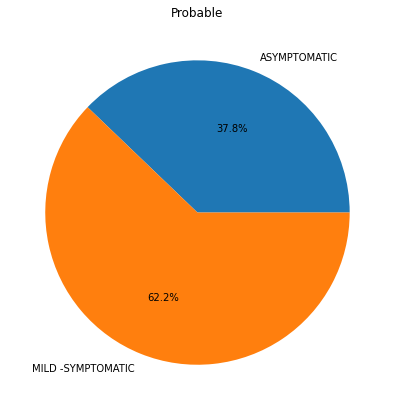

In [290]:
# A variable to count the correctly predicted outputs
ASYMP_APC = 0
MILD_SYMP_APC = 0

# a for loop to calculate the correct or accurate predictions of the predicted data
for ind in range (len(LRM_Predicted_ProCases_df[f'{MainColumn}'])):

  if LRM_Predicted_ProCases_df[f'{MainColumn}'][ind] == 'ASYMPTOMATIC':

    ASYMP_APC += 1

  else:

    MILD_SYMP_APC += 1

# Total number of the accurate prediction results
ASYMP_APC
MILD_SYMP_APC

colName = ['ASYMPTOMATIC', 'MILD -SYMPTOMATIC']
data = [ASYMP_APC, MILD_SYMP_APC]

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = colName, autopct = '%.1f%%')
plt.title('Probable') 
# show plot
plt.show()

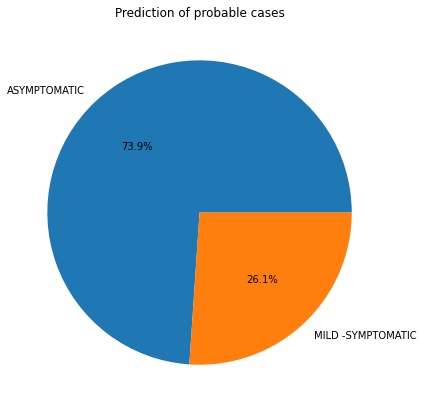

748

In [291]:
# A variable to count the correctly predicted outputs
ASYMP_PPC = 0
MILD_SYMP_PPC = 0

# a for loop to calculate the correct or accurate predictions of the predicted data
for ind in range (len(LRM_Predicted_ProCases_df['PREDICTION'])):

  if LRM_Predicted_ProCases_df['PREDICTION'][ind] == 'ASYMPTOMATIC':
    
    ASYMP_PPC += 1
  else:
    MILD_SYMP_PPC += 1


# Total number of the accurate prediction results
ASYMP_PPC
MILD_SYMP_PPC

colName = ['ASYMPTOMATIC', 'MILD -SYMPTOMATIC']
data = [ASYMP_PPC, MILD_SYMP_PPC]

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = colName,autopct = '%.1f%%')
plt.title('Prediction of probable cases') 
# show plot
plt.show()
len(LRM_Predicted_ProCases_df['PREDICTION'])

###### Suspected Cases

In [292]:
# Creating a new variable for the main simplified or processed dataframe
LRM_Predicted_SusCases_df = SimpSusCases_df

# Encoding string data to numeric data
SC_le = LabelEncoder()
SuspectedCase = SuspectedCases_df[MainColumn]

# Applying the fit and prediction function with the processed dataframe as the x value and the encoded target column as the y value of the function
SuspectedCase = SC_le.fit_transform(SuspectedCase)

# Applying the fit and prediction function with the processed dataframe as the x value and the encoded target column as the y value of the function
predicted_SCases  = LRM_fit_prediction(SimpSusCases_df, SuspectedCase)

###############################################################################################################################

# a for loop to round off the predicted output to a value or one or zero since there are only 2 possible output of this data
for val in range (len(predicted_SCases)):

  if predicted_SCases[val] >= 0.75:
    predicted_SCases[val] = 1

  else:
    predicted_SCases[val] = 0

###############################################################################################################################

# # Adding a case severity Numerical Valued column to our new dataframe.
LRM_Predicted_SusCases_df[f'{MainColumn} Numerical Values'] = SuspectedCase

# Adding a case severity column to our new dataframe.
LRM_Predicted_SusCases_df[f'{MainColumn}'] = SuspectedCases_df[MainColumn]

# Ading the predicted column to our dataframe
LRM_Predicted_SusCases_df['PREDICTION'] = predicted_SCases

###############################################################################################################################

In [293]:
LRM_Predicted_SusCases_df.head()

,FEVER(Y/N),COYGH (Y/N),COLDS (Y/N),DOB (Y/N),LOSS OF SMELL (Y/N),LOSS OF TASTE (Y/N),SORETHROAT (Y/N),DIARRHEA (Y/N),OTHER SYMPTOMS,WITH COMORBIDITY (Y/N),"COMORBIDITY (HYPERTENSIVE, DIABETIC, WITH HEART PROBLEM, AND OTHERS)",DATE OF SPECIMEN COLLECTION,ANTIGEN (POSITIVE/NEGATIVE),PCR(POSITIVE/NEGATIVE),"RDT(+IGG, +IGM,NEGATIVE)","SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL) Numerical Values","SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL)",PREDICTION
0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,ASYMPTOMATIC,0.0
1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,ASYMPTOMATIC,0.0
2,1,1,0,0,0,0,0,0,0,0,4,0,0,0,0,1,MILD -SYMPTOMATIC,1.0
3,0,1,0,0,0,0,1,0,0,0,4,0,0,0,0,1,MILD -SYMPTOMATIC,1.0
4,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,ASYMPTOMATIC,0.0


In [294]:
# A variable to count the correctly predicted outputs
counter = 0

# a for loop to calculate the correct or accurate predictions of the predicted data

for ind in range (len(LRM_Predicted_SusCases_df)):
  if LRM_Predicted_SusCases_df[f'{MainColumn} Numerical Values'][ind] == LRM_Predicted_SusCases_df['PREDICTION'][ind]:
    counter += 1

# Total number of the accurate prediction results
counter

1337

In [295]:
# Total number of the accurate prediction results as a percentage of the length of the dataframe file
Precision_Value = "{:.2f}".format((counter / len(LRM_Predicted_SusCases_df)) * 100)
Precision_Value + ' %'

'79.02 %'

In [296]:
# Converting the predicted results to the appropriate string values by reversing the label encoding
LRM_Predicted_SusCases_df['PREDICTION'] = SC_le.inverse_transform(LRM_Predicted_SusCases_df['PREDICTION'].apply(int))

In [297]:
LRM_Predicted_SusCases_df.head()

,FEVER(Y/N),COYGH (Y/N),COLDS (Y/N),DOB (Y/N),LOSS OF SMELL (Y/N),LOSS OF TASTE (Y/N),SORETHROAT (Y/N),DIARRHEA (Y/N),OTHER SYMPTOMS,WITH COMORBIDITY (Y/N),"COMORBIDITY (HYPERTENSIVE, DIABETIC, WITH HEART PROBLEM, AND OTHERS)",DATE OF SPECIMEN COLLECTION,ANTIGEN (POSITIVE/NEGATIVE),PCR(POSITIVE/NEGATIVE),"RDT(+IGG, +IGM,NEGATIVE)","SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL) Numerical Values","SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL)",PREDICTION
0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,ASYMPTOMATIC,ASYMPTOMATIC
1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,ASYMPTOMATIC,ASYMPTOMATIC
2,1,1,0,0,0,0,0,0,0,0,4,0,0,0,0,1,MILD -SYMPTOMATIC,MILD -SYMPTOMATIC
3,0,1,0,0,0,0,1,0,0,0,4,0,0,0,0,1,MILD -SYMPTOMATIC,MILD -SYMPTOMATIC
4,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,ASYMPTOMATIC,ASYMPTOMATIC


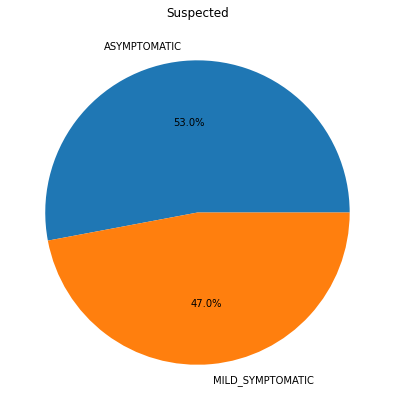

In [298]:
# A variable to count the correctly predicted outputs
ASYMP_ASC = 0
MILD_SYMP_ASC = 0

# a for loop to calculate the correct or accurate predictions of the predicted data
for ind in range (len(LRM_Predicted_SusCases_df[f'{MainColumn}'])):

  if LRM_Predicted_SusCases_df[f'{MainColumn}'][ind] == 'ASYMPTOMATIC':

    ASYMP_ASC += 1

  elif LRM_Predicted_SusCases_df[f'{MainColumn}'][ind] == 'MILD -SYMPTOMATIC':

    MILD_SYMP_ASC += 1

# Total number of the accurate prediction results
ASYMP_ASC
MILD_SYMP_ASC

colName = ['ASYMPTOMATIC', 'MILD_SYMPTOMATIC']
data = [ASYMP_ASC, MILD_SYMP_ASC]

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = colName, autopct = '%.1f%%')
plt.title('Suspected') 
# show plot
plt.show()

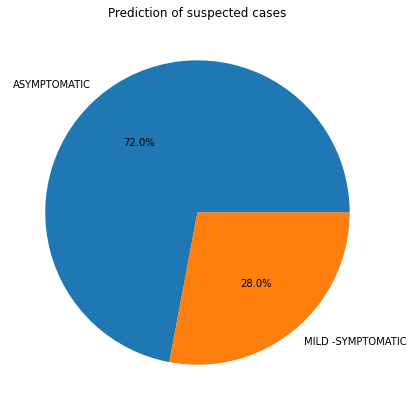

In [299]:
# A variable to count the correctly predicted outputs
ASYMP_PSC = 0
MILD_SYMP_PSC = 0

# a for loop to calculate the correct or accurate predictions of the predicted data
for ind in range (len(LRM_Predicted_SusCases_df)):

  if LRM_Predicted_SusCases_df['PREDICTION'][ind] == 'ASYMPTOMATIC':
    ASYMP_PSC += 1

  else:

    MILD_SYMP_PSC += 1



# Total number of the accurate prediction results
ASYMP_PSC
MILD_SYMP_PSC

colName = ['ASYMPTOMATIC', 'MILD -SYMPTOMATIC']
data = [ASYMP_PSC, MILD_SYMP_PSC]

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = colName,autopct = '%.1f%%')
plt.title('Prediction of suspected cases') 
# show plot
plt.show()

## Random Forest Regression Model

### Training the RFR model (Confirmed Cases)

In [300]:
# importing libraries for the random forest classifier visualization
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [301]:
# functions to remove columns added to the processed dataframe due to inheritance in python
def ColumnRemove(dataframe):

  RFR_remove = 	'SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL)', 'SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL) Numerical Values',	'PREDICTION' 

  for c in RFR_remove:

    if c in dataframe.columns:

      dataframe.drop(columns=[c] , inplace=True)

    else:

      pass

  return dataframe

###############################################################################################################################

In [302]:
# Creating a LabelEncoder for our result data
RFM_le = LabelEncoder()

# Assigning and converting the result data
RFR_Traintarget = ConfirmedCases_df[MainColumn][0:13860]
RFR_Traintarget = RFM_le.fit_transform(RFR_Traintarget)

# Assigning parameters to train and test in the model
xx = SimpConCases_df
yy = RFR_Traintarget

# Splitting the data with a value of 30% amoungst the training data and testing data
xx_train , xx_test , yy_train , yy_test = train_test_split(xx, yy, test_size = 0.3)

# Defining our model and assign it to a variable
model = tree.DecisionTreeRegressor()

In [303]:
# fitting training data into out linear regression model
model.fit(xx_train, yy_train)

DecisionTreeRegressor()

In [304]:
# Checking the model accuracy score
model.score(xx_test, yy_test)

0.9250628826154956

[Text(0.4096922071717626, 0.9827586206896551, 'X[7] <= 15.5\ngini = 0.611\nsamples = 2634\nvalue = [2079, 0, 1388, 3, 1, 687]'),
 Text(0.13108513189448442, 0.9482758620689655, 'X[1] <= 5.5\ngini = 0.472\nsamples = 553\nvalue = [560, 0, 28, 1, 0, 263]'),
 Text(0.10245803357314148, 0.9137931034482759, 'X[2] <= 3.5\ngini = 0.293\nsamples = 438\nvalue = [560, 0, 11, 0, 0, 107]'),
 Text(0.07014388489208633, 0.8793103448275862, 'X[8] <= 9.5\ngini = 0.234\nsamples = 416\nvalue = [560, 0, 10, 0, 0, 76]'),
 Text(0.04028776978417266, 0.8448275862068966, 'X[2] <= 1.0\ngini = 0.049\nsamples = 232\nvalue = [352, 0, 0, 0, 0, 9]'),
 Text(0.030695443645083934, 0.8103448275862069, 'X[0] <= 16.5\ngini = 0.04\nsamples = 223\nvalue = [340, 0, 0, 0, 0, 7]'),
 Text(0.02685851318944844, 0.7758620689655172, 'X[3] <= 11.5\ngini = 0.029\nsamples = 221\nvalue = [340, 0, 0, 0, 0, 5]'),
 Text(0.02302158273381295, 0.7413793103448276, 'X[0] <= 8.5\ngini = 0.023\nsamples = 220\nvalue = [340, 0, 0, 0, 0, 4]'),
 Text(0

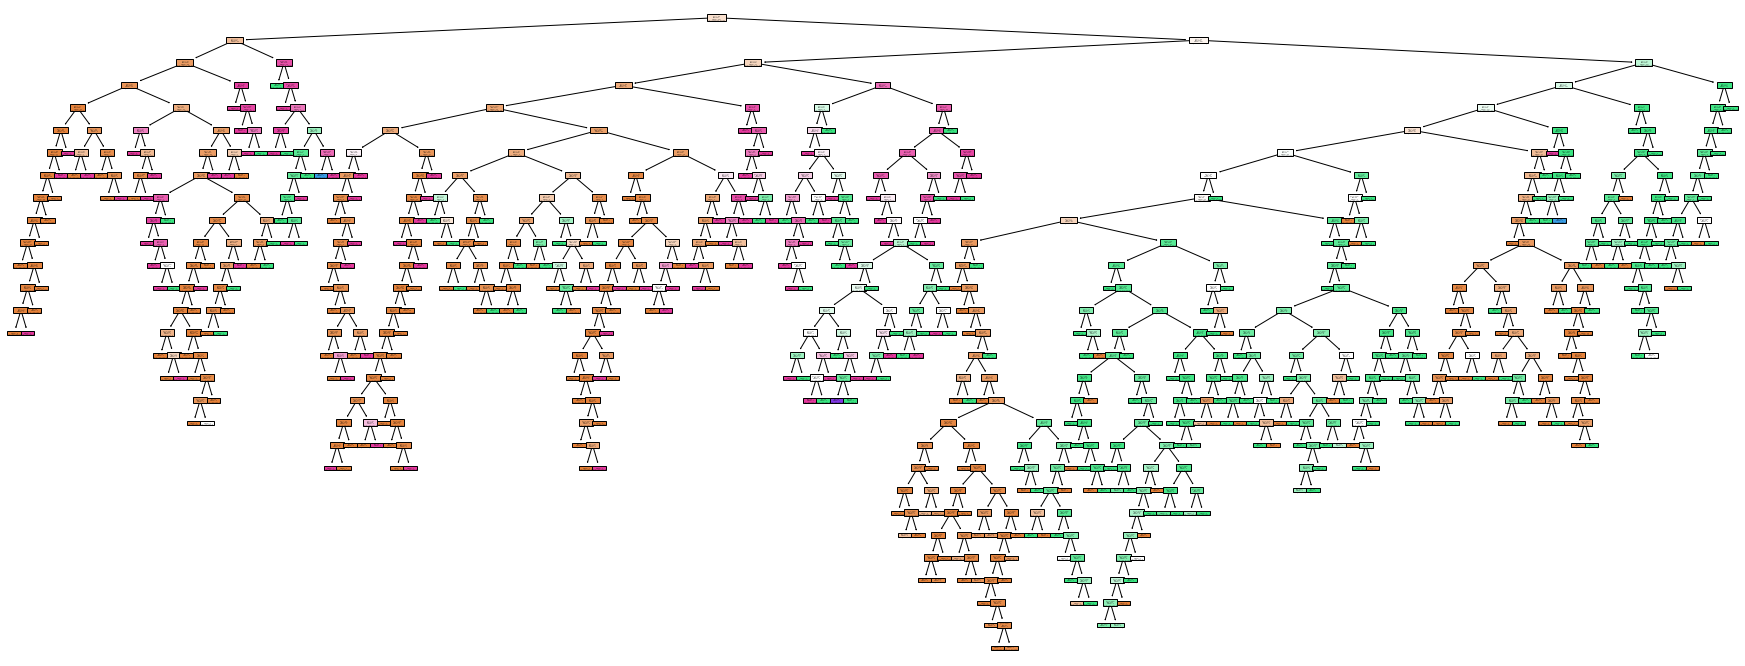

In [305]:
# defining our visualization figure size
plt.figure(figsize=(31,12))

# defining the random forest classifier
clf = RandomForestClassifier(n_estimators=19,random_state=0)

# assigning the data to be fitted in the classifier
X = xx_test
Y = yy_test

# fitting the test data in the classifier 
clf = clf.fit(X, Y)

# Creating a visualization diagram of the data
tree.plot_tree(clf.estimators_[2],filled=True)

### Random Forest Regression Predictions

---



In [306]:
# function to fit and and predict the required data.
def RFR_fit_prediction(x, y):

  data_fit = model.fit(x, y)

  data = model.predict(x)
  
  return data

#### Prediction Outputs

###### Probable Cases

In [307]:
# Creating a new variable for the main simplified or processed dataframe
RFR_Predicted_ProCases_df = SimpProCases_df

# creating a severity of the case column for the dataframe
RFR_Predicted_ProCases_df[f'{MainColumn}'] = ProbableCases_df[MainColumn]

# Encoding string data to numeric data
P_le = LabelEncoder()
ProbableTarget = ProbableCases_df[MainColumn]
ProTarget_le = P_le.fit_transform(ProbableTarget)

# Applying the fit and prediction function with the processed dataframe as the x value and the encoded target column as the y value of the function
predicted_data_PCases  = RFR_fit_prediction(ColumnRemove(SimpProCases_df), ProTarget_le)

###############################################################################################################################

# a for loop to round off the predicted output to a value or one or zero since there are only 2 possible output of this data
for val in range (len(predicted_data_PCases)):

  if predicted_data_PCases[val] >= 0.9:
    predicted_data_PCases[val] = 1

  else:
    predicted_data_PCases[val] = 0

###############################################################################################################################

# Adding a case severity Numerical Valued column to our new dataframe.
RFR_Predicted_ProCases_df[f'{MainColumn} Numerical Values'] = ProTarget_le

# Adding a case severity column to our new dataframe.
RFR_Predicted_ProCases_df[f'{MainColumn}'] = ProbableCases_df[MainColumn]

# Ading the predicted column to our dataframe
RFR_Predicted_ProCases_df['PREDICTION'] = predicted_data_PCases

###############################################################################################################################

In [308]:
RFR_Predicted_ProCases_df.head()

,FEVER(Y/N),COYGH (Y/N),COLDS (Y/N),DOB (Y/N),LOSS OF SMELL (Y/N),LOSS OF TASTE (Y/N),SORETHROAT (Y/N),DIARRHEA (Y/N),OTHER SYMPTOMS,WITH COMORBIDITY (Y/N),"COMORBIDITY (HYPERTENSIVE, DIABETIC, WITH HEART PROBLEM, AND OTHERS)",DATE OF SPECIMEN COLLECTION,ANTIGEN (POSITIVE/NEGATIVE),PCR(POSITIVE/NEGATIVE),"RDT(+IGG, +IGM,NEGATIVE)","SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL) Numerical Values","SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL)",PREDICTION
0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,ASYMPTOMATIC,0.0
1,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,ASYMPTOMATIC,0.0
2,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,ASYMPTOMATIC,0.0
3,0,1,0,0,0,0,0,0,0,0,3,1,0,0,0,1,MILD -SYMPTOMATIC,1.0
4,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,ASYMPTOMATIC,0.0


In [309]:
# A variable to count the correctly predicted outputs
counter = 0

# a for loop to calculate the correct or accurate predictions of the predicted data
for ind in range (len(RFR_Predicted_ProCases_df)):
  if RFR_Predicted_ProCases_df[f'{MainColumn} Numerical Values'][ind] == RFR_Predicted_ProCases_df['PREDICTION'][ind]:
    counter += 1

# Total number of the accurate prediction results
counter

706

In [310]:
# Total number of the accurate prediction results as a percentage of the length of the dataframe file
Precision_Value = "{:.2f}".format((counter / len(RFR_Predicted_ProCases_df)) * 100)
Precision_Value + ' %'

'94.39 %'

In [311]:
# Converting the predicted results to the appropriate string values by reversing the label encoding
RFR_Predicted_ProCases_df['PREDICTION'] = P_le.inverse_transform(RFR_Predicted_ProCases_df['PREDICTION'].apply(int))

In [312]:
RFR_Predicted_ProCases_df.head()

,FEVER(Y/N),COYGH (Y/N),COLDS (Y/N),DOB (Y/N),LOSS OF SMELL (Y/N),LOSS OF TASTE (Y/N),SORETHROAT (Y/N),DIARRHEA (Y/N),OTHER SYMPTOMS,WITH COMORBIDITY (Y/N),"COMORBIDITY (HYPERTENSIVE, DIABETIC, WITH HEART PROBLEM, AND OTHERS)",DATE OF SPECIMEN COLLECTION,ANTIGEN (POSITIVE/NEGATIVE),PCR(POSITIVE/NEGATIVE),"RDT(+IGG, +IGM,NEGATIVE)","SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL) Numerical Values","SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL)",PREDICTION
0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,ASYMPTOMATIC,ASYMPTOMATIC
1,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,ASYMPTOMATIC,ASYMPTOMATIC
2,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,ASYMPTOMATIC,ASYMPTOMATIC
3,0,1,0,0,0,0,0,0,0,0,3,1,0,0,0,1,MILD -SYMPTOMATIC,MILD -SYMPTOMATIC
4,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,ASYMPTOMATIC,ASYMPTOMATIC


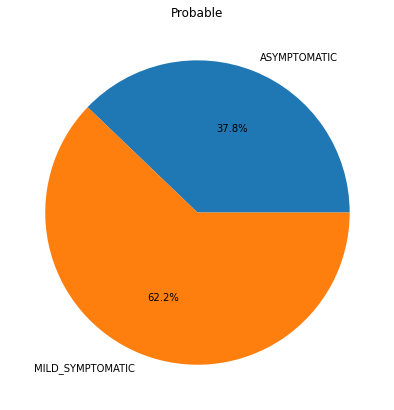

In [313]:
# A variable to count the correctly predicted outputs
ASYMP_APC = 0
MILD_SYMP_APC = 0

# a for loop to calculate the correct or accurate predictions of the predicted data
for ind in range (len(RFR_Predicted_ProCases_df[f'{MainColumn}'])):

  if RFR_Predicted_ProCases_df[f'{MainColumn}'][ind] == 'ASYMPTOMATIC':

    ASYMP_APC += 1

  else:

    MILD_SYMP_APC += 1


# Total number of the accurate prediction results
ASYMP_APC
MILD_SYMP_APC

colName = ['ASYMPTOMATIC', 'MILD_SYMPTOMATIC']
data = [ASYMP_APC, MILD_SYMP_APC]

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = colName, autopct = '%.1f%%')
plt.title('Probable') 
# show plot
plt.show()

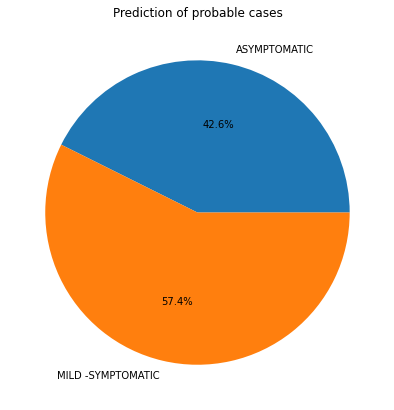

748

In [314]:
# A variable to count the correctly predicted outputs
ASYMP_PPC = 0
MILD_SYMP_PPC = 0

# a for loop to calculate the correct or accurate predictions of the predicted data
for ind in range (len(RFR_Predicted_ProCases_df['PREDICTION'])):

  if RFR_Predicted_ProCases_df['PREDICTION'][ind] == 'ASYMPTOMATIC':

    ASYMP_PPC += 1

  else:

    MILD_SYMP_PPC += 1


# Total number of the accurate prediction results
ASYMP_PPC
MILD_SYMP_PPC

colName = ['ASYMPTOMATIC', 'MILD -SYMPTOMATIC']
data = [ASYMP_PPC, MILD_SYMP_PPC]

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = colName,autopct = '%.1f%%')
plt.title('Prediction of probable cases') 
# show plot
plt.show()
len(RFR_Predicted_ProCases_df['PREDICTION'])

###### Suspected Cases

In [315]:
# Creating a new variable for the main simplified or processed dataframe
RFR_Predicted_SusCases_df = SimpSusCases_df

# creating a severity of the case column for the dataframe
RFR_Predicted_SusCases_df[f'{MainColumn}'] = SuspectedCases_df[MainColumn]

# Encoding string data to numeric data
S_le = LabelEncoder()
SuspectedTarget = SuspectedCases_df[MainColumn]
SusTarget_le = S_le.fit_transform(SuspectedTarget)

# Applying the fit and prediction function with the processed dataframe as the x value and the encoded target column as the y value of the function
predicted_data_SCases  = RFR_fit_prediction(ColumnRemove(SimpSusCases_df), SusTarget_le)

###############################################################################################################################

# a for loop to round off the predicted output to a value or one or zero since there are only 2 possible output of this data
for val in range (len(predicted_data_SCases)):

  if predicted_data_SCases[val] >= 0.9:
    predicted_data_SCases[val] = 1

  else:
    predicted_data_SCases[val] = 0

################################################################################################################################

# Adding a case severity Numerical Valued column to our new dataframe.
RFR_Predicted_SusCases_df[f'{MainColumn} Numerical Values'] = SusTarget_le

# Adding a case severity column to our new dataframe.
RFR_Predicted_SusCases_df[f'{MainColumn}'] = SuspectedCases_df[MainColumn]

# Ading the predicted column to our dataframe
RFR_Predicted_SusCases_df['PREDICTION'] = predicted_data_SCases

###############################################################################################################################

In [316]:
RFR_Predicted_SusCases_df.head()

,FEVER(Y/N),COYGH (Y/N),COLDS (Y/N),DOB (Y/N),LOSS OF SMELL (Y/N),LOSS OF TASTE (Y/N),SORETHROAT (Y/N),DIARRHEA (Y/N),OTHER SYMPTOMS,WITH COMORBIDITY (Y/N),"COMORBIDITY (HYPERTENSIVE, DIABETIC, WITH HEART PROBLEM, AND OTHERS)",DATE OF SPECIMEN COLLECTION,ANTIGEN (POSITIVE/NEGATIVE),PCR(POSITIVE/NEGATIVE),"RDT(+IGG, +IGM,NEGATIVE)","SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL) Numerical Values","SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL)",PREDICTION
0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,ASYMPTOMATIC,0.0
1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,ASYMPTOMATIC,0.0
2,1,1,0,0,0,0,0,0,0,0,4,0,0,0,0,1,MILD -SYMPTOMATIC,1.0
3,0,1,0,0,0,0,1,0,0,0,4,0,0,0,0,1,MILD -SYMPTOMATIC,1.0
4,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,ASYMPTOMATIC,0.0


In [317]:
# A variable to count the correctly predicted outputs
counter = 0

# a for loop to calculate the correct or accurate predictions of the predicted data
for ind in range (len(RFR_Predicted_SusCases_df)):
  if RFR_Predicted_SusCases_df[f'{MainColumn} Numerical Values'][ind] == RFR_Predicted_SusCases_df['PREDICTION'][ind]:
    counter += 1

# Total number of the accurate prediction results
counter

1599

In [318]:
# Total number of the accurate prediction results as a percentage of the length of the dataframe file
Precision_Value = "{:.2f}".format((counter / len(RFR_Predicted_SusCases_df)) * 100)
Precision_Value + ' %'

'94.50 %'

In [319]:
# Converting the predicted results to the appropriate string values by reversing the label encoding
RFR_Predicted_SusCases_df['PREDICTION'] = S_le.inverse_transform(RFR_Predicted_SusCases_df['PREDICTION'].apply(int))

In [320]:
RFR_Predicted_SusCases_df.head()

,FEVER(Y/N),COYGH (Y/N),COLDS (Y/N),DOB (Y/N),LOSS OF SMELL (Y/N),LOSS OF TASTE (Y/N),SORETHROAT (Y/N),DIARRHEA (Y/N),OTHER SYMPTOMS,WITH COMORBIDITY (Y/N),"COMORBIDITY (HYPERTENSIVE, DIABETIC, WITH HEART PROBLEM, AND OTHERS)",DATE OF SPECIMEN COLLECTION,ANTIGEN (POSITIVE/NEGATIVE),PCR(POSITIVE/NEGATIVE),"RDT(+IGG, +IGM,NEGATIVE)","SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL) Numerical Values","SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL)",PREDICTION
0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,ASYMPTOMATIC,ASYMPTOMATIC
1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,ASYMPTOMATIC,ASYMPTOMATIC
2,1,1,0,0,0,0,0,0,0,0,4,0,0,0,0,1,MILD -SYMPTOMATIC,MILD -SYMPTOMATIC
3,0,1,0,0,0,0,1,0,0,0,4,0,0,0,0,1,MILD -SYMPTOMATIC,MILD -SYMPTOMATIC
4,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,ASYMPTOMATIC,ASYMPTOMATIC


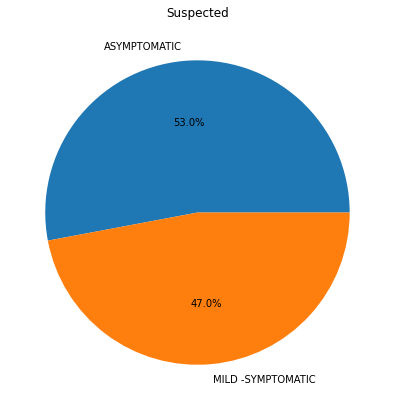

In [321]:
# A variable to count the correctly predicted outputs
ASYMP_ASC = 0
MILD_SYMP_ASC = 0

# a for loop to calculate the correct or accurate predictions of the predicted data
for ind in range (len(RFR_Predicted_SusCases_df)):

  if RFR_Predicted_SusCases_df[f'{MainColumn}'][ind] == 'ASYMPTOMATIC':

    ASYMP_ASC += 1

  else:

    MILD_SYMP_ASC += 1



# Total number of the accurate prediction results
ASYMP_ASC
MILD_SYMP_ASC

colName = ['ASYMPTOMATIC', 'MILD -SYMPTOMATIC']
data = [ASYMP_ASC, MILD_SYMP_ASC]

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = colName, autopct = '%.1f%%')
plt.title('Suspected') 
# show plot
plt.show()

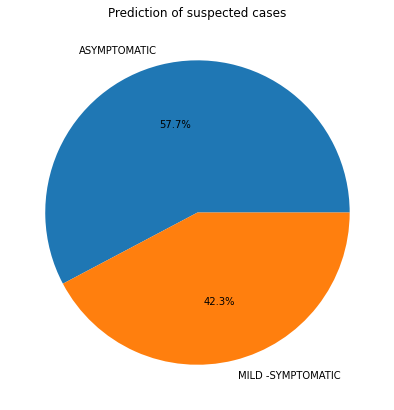

In [322]:
# A variable to count the correctly predicted outputs
ASYMP_ASC = 0
MILD_SYMP_ASC = 0

# a for loop to calculate the correct or accurate predictions of the predicted data
for ind in range (len(RFR_Predicted_SusCases_df)):

  if RFR_Predicted_SusCases_df['PREDICTION'][ind] == 'ASYMPTOMATIC':
    ASYMP_ASC += 1

  else:
    MILD_SYMP_ASC += 1


# Total number of the accurate prediction results
ASYMP_ASC
MILD_SYMP_ASC

colName = ['ASYMPTOMATIC', 'MILD -SYMPTOMATIC']
data = [ASYMP_ASC, MILD_SYMP_ASC]

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = colName,autopct = '%.1f%%')
plt.title('Prediction of suspected cases') 
# show plot
plt.show()

In [323]:
#!jupyter nbconvert --to html Mashava_Sedueste_Velado_ML_ResearchStudy.ipynb